In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.optimize import curve_fit
from scipy import stats
from statsmodels.graphics.tsaplots import plot_acf

In [2]:
def e_autocow(xt, h):
    n = len(xt)
    mu = np.mean(xt)
    sum = (
        1
        / n
        * np.sum(
            np.array([(xt[i + abs(h)] - mu) * (xt[i] - mu) for i in range(n - abs(h))])
        )
    )
    return sum


def e_autocor(xt, h):
    return e_autocow(xt, h) / e_autocow(xt, 0)

### Przygotowanie danych

In [3]:
sns.set()

In [4]:
data = pd.read_csv("eurpln.csv")

In [5]:
price = np.array(data["Open"])
date = np.array(data["Date"])

In [6]:
price = np.array(data["Open"])

In [7]:
# price = price[100:-1]

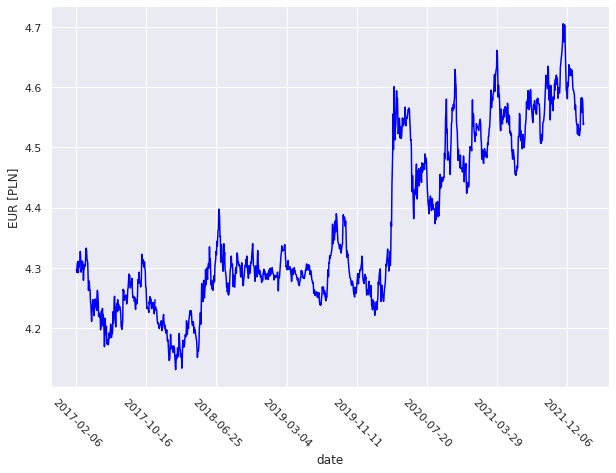

In [8]:
plt.figure(figsize=(10, 7))
plt.plot(price, color="blue")
# plt.title("Raw data", fontsize=18)
plt.xlabel("date")
plt.ylabel("EUR [PLN]")
plt.xticks(
    np.arange(0, len(price), 180),
    [date[i] for i in np.arange(0, len(price), 180)],
    rotation=-45,
)
plt.savefig("data.png", dpi=500)
plt.show()

# Usuwanie NAN

In [9]:
nan_index_list = np.argwhere(np.isnan(price))
for i in nan_index_list:
    price[i] = (price[i - 1] + price[i + 1]) / 2
np.savetxt("new_price.txt", price)

### Statystyki

In [10]:
mean = np.mean(price)
mean

4.366039915708813

In [11]:
var = np.var(price)
var

0.019127860313134654

In [12]:
std = np.sqrt(var)
std

0.1383035079567205

In [13]:
median = np.quantile(price, 0.5)
median

4.3051

In [14]:
Q1 = np.quantile(price, 0.25)
Q1

4.2626

In [15]:
Q3 = np.quantile(price, 0.75)
Q3

4.49917

In [16]:
4.580 - 4.481

0.0990000000000002

In [17]:
IQR = Q3 - Q1
IQR

0.2365700000000004

### Trend

In [18]:
X = np.array(list(range(len(price))))

In [19]:
fit = np.polyfit(X, price, 1)

In [20]:
a, b = fit[0], fit[1]

In [21]:
Y = a * X + b

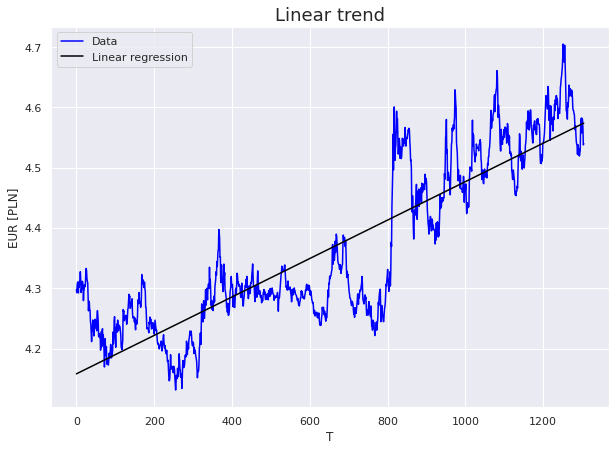

In [22]:
plt.figure(figsize=(10, 7))
plt.plot(price, color="blue", label="Data")
plt.plot(X, Y, color="black", label="Linear regression")
plt.title("Linear trend", fontsize=18)
plt.xlabel("T")
plt.ylabel("EUR [PLN]")
plt.legend()
plt.savefig("regression.png", dpi=500)

In [23]:
Y1 = price - Y

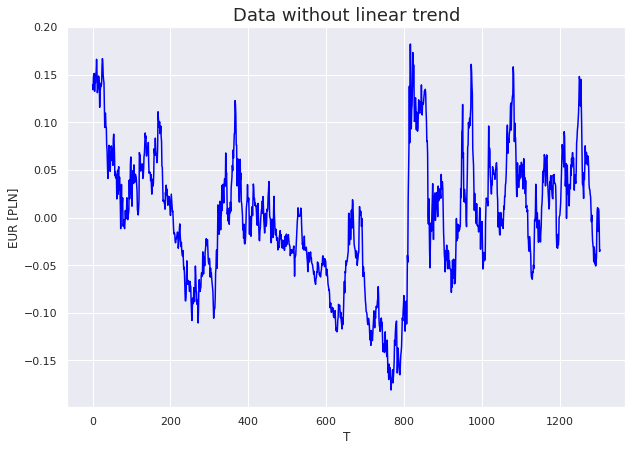

In [24]:
plt.figure(figsize=(10, 7))
plt.plot(Y1, color="blue")
plt.title("Data without linear trend", fontsize=18)
plt.xlabel("T")
plt.ylabel("EUR [PLN]")
plt.savefig("trend.png", dpi=500)

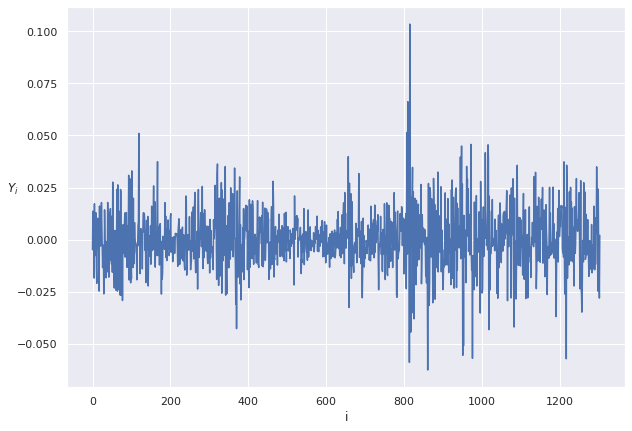

In [25]:
m = 1
ruznicowanie1 = [price[i] - price[i - m] for i in range(m, len(price))]
plt.figure(figsize=(10, 7))
plt.plot((ruznicowanie1))
stats.kstest((ruznicowanie1), "norm")
plt.ylabel("$Y_i$", rotation=0)
plt.xlabel("i")
np.savetxt("ruznicowanie1.txt", ruznicowanie1)
plt.savefig("trend.png", dpi=500)

### Sezonowość

In [26]:
def mysin(t, c1, c2, c3):
    return c1 * np.sin(c2 * t) + c3

In [27]:
fit1 = curve_fit(mysin, X, Y1, bounds=([0.06, 0.09, 0.0], [0.07, 0.1, 0.01]))
c, d, e = fit1[0]

In [28]:
print(c, d, e)

0.060000000000000005 0.09323520967464968 1.0787261124165426e-32


In [29]:
sin1 = mysin(X, c, d, e)

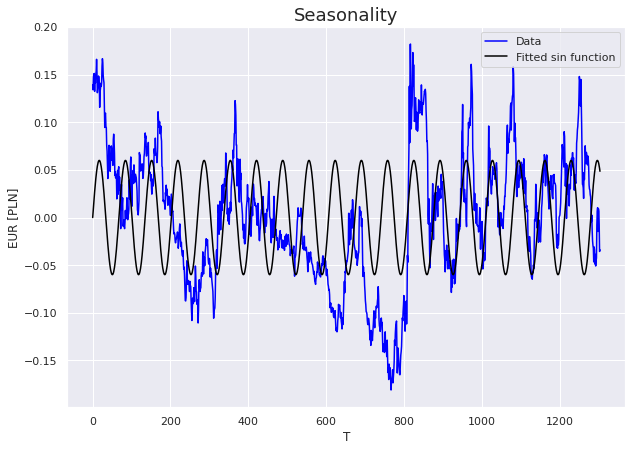

In [30]:
plt.figure(figsize=(10, 7))
plt.plot(Y1, color="blue", label="Data")
plt.plot(X, sin1, color="black", label="Fitted sin function")
plt.title("Seasonality", fontsize=18)
plt.xlabel("T")
plt.ylabel("EUR [PLN]")
plt.legend()
plt.savefig("season.png", dpi=500)

In [31]:
Y2 = Y1 - sin1

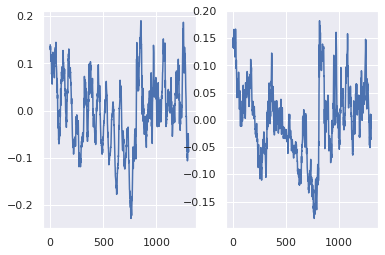

In [32]:
plt.subplot(121)
plt.plot(Y2)
plt.subplot(122)
plt.plot(Y1)

# Analiza danych po tredzie

In [35]:
dane2 = ruznicowanie1

TypeError: savefig() missing 1 required positional argument: 'fname'

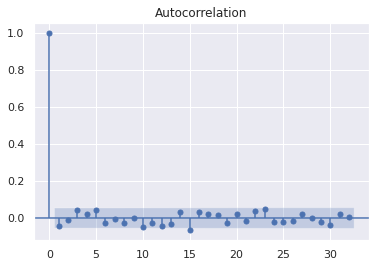

In [ ]:
hs = range(0, 41)
# plt.stem(hs,[e_autocor(dane2,i) for i in hs] ,label = "emp. ACV")
plot_acf(np.array(dane2))
plt.savefig("")
plt.show()